# TMNIST Alphabet Character Recognition | Accuracy : 93%

# Abstract:

This project presents a detailed guide for constructing a character recognition model, akin to the renowned MNIST project for identifying handwritten digits. The guide focuses on leveraging the TMNIST dataset, which encompasses a broader spectrum of characters.

In [70]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
import tensorflow as tf 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Inputting the data**

In [71]:
data_path = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
char_data = pd.read_csv(data_path)

# EDA

In [72]:
char_data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
char_data.shape

(274093, 786)

In [74]:
num_classes=char_data['labels'].nunique()
num_classes

94

As we can see the number of unique classes only includes 94 

In [75]:
X = char_data.drop(columns=['names','labels']).values
y = char_data[['labels']].values 

In [76]:
X = X.astype('float') 
X.dtype

dtype('float64')

In [77]:
X.shape, y.shape  

((274093, 784), (274093, 1))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

After splitting the dataset, the code reshapes the y_train and y_test arrays. 

The **reshape((-1,))** function call is used to ensure that the labels are reshaped into a one-dimensional array. 

In [79]:
X_train, X_test, y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['<', 'H', '2', ..., 'k', 's', '='], dtype=object),
 array(['X', '-', 'Q', ..., 'J', ':', 'C'], dtype=object))

In [80]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

LabelEncoder is used to transform categorical labels into unique integer values so that the categorical character labels are converted to numerical representation, helping in model training.

In [81]:
# Normalize input features
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

Normalizing the pixel values which can range from 0 to 255 to a scale, between 0 and 1, ensures that all features have a similar scale. This will help prevent certain features from dominating others during training.

In [82]:
# Reshape input data for CNN
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 28, 28, 1)

Since CNN expect input data in a specific shape we have to resphape it into a we have to reshape it into a 4D array where the dimensions correspond to the batch size, height, width, and number of channels. This transformation ensures that the CNN model can process the input images correctly and efficiently, allowing it to learn meaningful representations from the data and make accurate predictions.

In [83]:
# Define CNN model architecture
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

We are trying to create a sequential model, It is a model which has a linear stack of layers. We add a 2D convolutional layer with 32 filters as the first hidden layer

For activation function we're using relu  Rectified Linear Unit (ReLU) which introduces non-linearity to the model.

We also add MaxPooling which reduces the spatial dimensions of the input, helping to reduce computation and hence extract dominant features.

Flatten() converts the 2D feature maps from the convolutional layers into a 1D vector which is necessary to connect the convolutional layers to the dense layers.

Dropout(0.5) is a regularization technique which sets 50% of the input units are randomly set to zero helping the network learn more robust features. 

For the last dense layer 
we add the output layer with the number of neurons equal to the number of classes in the dataset.
The activation='softmax' parameter applies the softmax function to produce probabilities for each class, allowing the model to output a probability distribution over the classes.

In [87]:
# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=6, validation_data=(X_test_reshaped, y_test_encoded), verbose = 1)


Epoch 1/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 149s 22ms/step - accuracy: 0.8729 - loss: 0.4242 - val_accuracy: 0.9219 - val_loss: 0.2525
Epoch 2/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 192s 20ms/step - accuracy: 0.8948 - loss: 0.3493 - val_accuracy: 0.9281 - val_loss: 0.2330
Epoch 3/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 136s 20ms/step - accuracy: 0.9067 - loss: 0.3054 - val_accuracy: 0.9298 - val_loss: 0.2208
Epoch 4/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 136s 20ms/step - accuracy: 0.9130 - loss: 0.2865 - val_accuracy: 0.9308 - val_loss: 0.2164
Epoch 5/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 20ms/step - accuracy: 0.9167 - loss: 0.2655 - val_accuracy: 0.9316 - val_loss: 0.2191
Epoch 6/6
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 136s 20ms/step - accuracy: 0.9194 - loss: 0.2555 - val_accuracy: 0.9348 - val_loss: 0.2085


compile() is used to configure the learning process before training the model.
we used adam as the optimizer.
after compiling we are fitting the model to our reshaped data sets. 
during fitting validation_data parameter is used evaluate the model's performance after each epoch


In [88]:
# Evaluate the model on the test set
loss, accuracy = cnn_model.evaluate(X_test_reshaped, y_test_encoded)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9351 - loss: 0.2090
Test Loss: 0.20850364863872528
Test Accuracy: 0.9348400831222534


As we can see the accuracy of our model is 93%

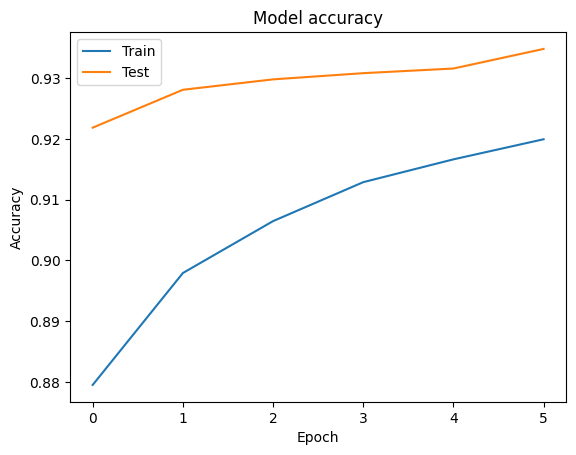

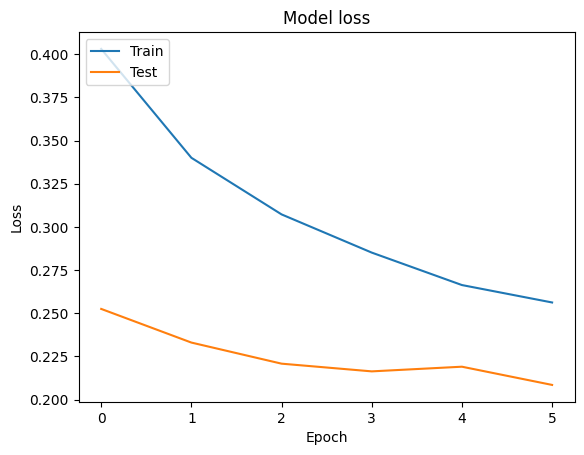

In [89]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From the plots we can figure out that for the test set the accuracy increases which means our CNN model is working very good. Even the loss decreases significantly for the test set